Text(0.5, 0.98, 'Do you wash raw meat and poultry (1&5 comb)')

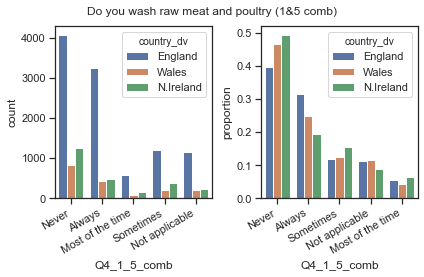

In [3]:
"""
Created on Thu Apr  2 21:14:12 2020

@author: charliejeynes

this script is exploratory data analysis on qustion 4 in the food and you survey data 
using seaborn
   
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")  
%matplotlib inline

# import data
df = pd.read_csv('/Users/charliejeynes/Documents/Pivago local documents/data/food survey/Food+and+You+Waves+1-5+Data (3).csv')

# select the columns interested in within the dataframe
df_select = df[['Q4_1_5_comb','q4_1_6','q4_1_7', 'country_dv', 'surveyyear']]

# replace  - 'refused:-9', 'don't knows:-8', 'not applicable:5' 
# - into not applicable: -1 numbers
df_select = df_select.replace([-9, -8, 5, 98], -1)

# use seaborn barplot for proportions of responses per group
x, y, hue = "Q4_1_5_comb", "proportion", "country_dv"
prop_df = (df_select[x]
           .groupby(df_select[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
#sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

# key to country
country = { 1:'England', 
            2: 'Wales',
            3: 'N.Ireland'
          }

# key to answers
ans = { # -9	:'Refused'
        #,-8	:'Dont know'
        -1	:'Not applicable'
        ,1	:'Never'
        ,2	:'Sometimes'
        ,3	:'Most of the time'
        ,4	:'Always'
        #,5	:'Not applicable'
       }
# replace country keys with real names in the created df
df_select = df_select.replace({"country_dv": country})
prop_df = prop_df.replace({"country_dv": country})

# replace answers keys with real answers in the created df
df_select = df_select.replace({"Q4_1_5_comb": ans})
prop_df = prop_df.replace({"Q4_1_5_comb": ans})

# create a figure subplot and  use seaborn's countplot and barplot
f, axes = plt.subplots(1, 2)
hue_order = ['England', 'Wales', 'N.Ireland']
sns.countplot(x=x, hue=hue, hue_order=hue_order, data=df_select, ax=axes[0])
sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
f.autofmt_xdate()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
f.suptitle('Do you wash raw meat and poultry (1&5 comb)')
